In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

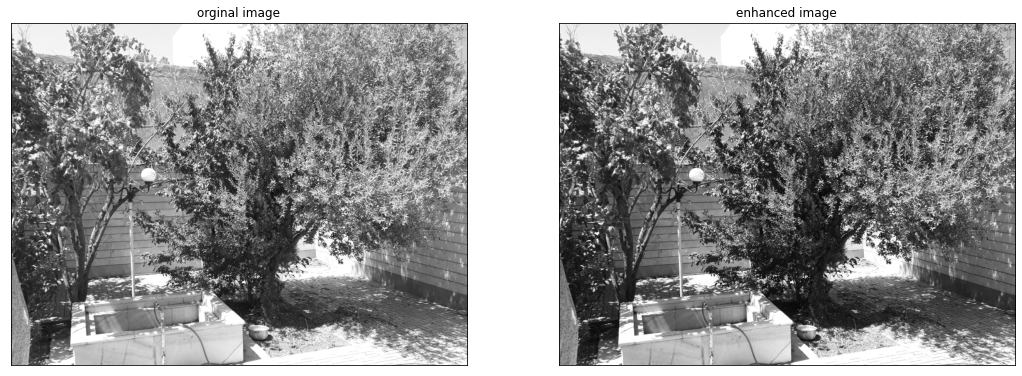

In [12]:
# opencv library in python, doesn't have builtin function for gamma correction, so we defined a function ourselves
# If you want to use builtin function you can use  'exposure.adjust_gamma' method of skimage library
# https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.adjust_gamma

def imadjust(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255	for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

# Read the image in greyscale
img = np.array(cv2.imread("yard.jpg", cv2.IMREAD_GRAYSCALE), dtype=np.uint8)

gamma = 0.8
im_enh = imadjust(img, gamma)

fig, axes= plt.subplots(1, 2, figsize=(18, 18))
axes[0].imshow(img, 'gray')
axes[0].set_title('orginal image')

axes[1].imshow(im_enh, 'gray')
axes[1].set_title('enhanced image')


# remove the x and y ticks
for i in range(axes.shape[0]):
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
